<a href="https://colab.research.google.com/github/cgoeser1/MSDS422_course_assignments/blob/main/Titanic(2021OCT17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival**

# **Conduct EDA on the dataset as follows:**
* Conduct your analysis using a cross-validation design.
* Build at least three models to classify survivors.
  -  A logistic regression model
  - An LDA or QDA model
  - A KNN model
* Evaluate each of the models’ assumptions.
* Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy.
* Build ROC and Precision / Recall graphs.
* Submit your models’ predictions to Kaggle.com for evaluation on the test set and provide your Kaggle.com user name and a screen snapshot of your scores.
* Discuss what your models tell you in layman’s terms.

* Chad can see this 10-13-2021
* Anty can see this 10/13/2021

Import all relevant packages.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from scipy import stats

# to make this notebook's output stable across runs
np.random.seed(31)


# To plot pretty figures
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Clone the repository, so all files are in the same folder.  Should be accessible to all collaborators.

In [ ]:
!git clone https://github.com/cgoeser1/MSDS422_course_assignments


Cloning into 'MSDS422_course_assignments'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 56 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


Change the Colab working directory to that just cloned from GitHub.
Confirm the working directory.

In [ ]:
os.chdir('/content/MSDS422_course_assignments')
os.getcwd()

'/content/MSDS422_course_assignments'


Load train and test files into Pandas dataframes.

In [ ]:
## Get data from the provided CSV files.
train = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(train['Cabin'].unique())
#len(train['Age'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [ ]:
#Check the number of observations for each feature in the 'train' set.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

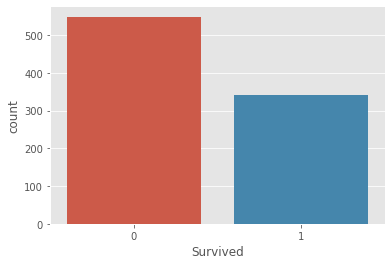

In [ ]:
sns.countplot(x='Survived', data=train);

In [ ]:
## quick look at percentage of male and females who survived:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"% of women who survived: {rate_women*100:.2f}")
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"% of men who survived: {rate_men*100:.2f}")
rate_all = sum(train["Survived"])/len(train["Survived"]) 
print(f"% of all who survived: {rate_all*100:.2f}")

% of women who survived: 74.20
% of men who survived: 18.89
% of all who survived: 38.38


In [ ]:
print(f"Women_Survival\tMen_Survival\tAll_Survival")
print(f"{rate_women*100:.2f}%\t\t{rate_men*100:.2f}%\t\t{rate_all*100:.2f}%")

Women_Survival	Men_Survival	All_Survival
74.20%		18.89%		38.38%


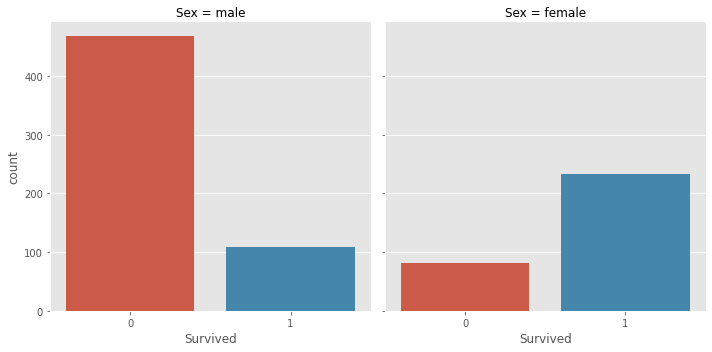

In [ ]:
## look at the percentages visually
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

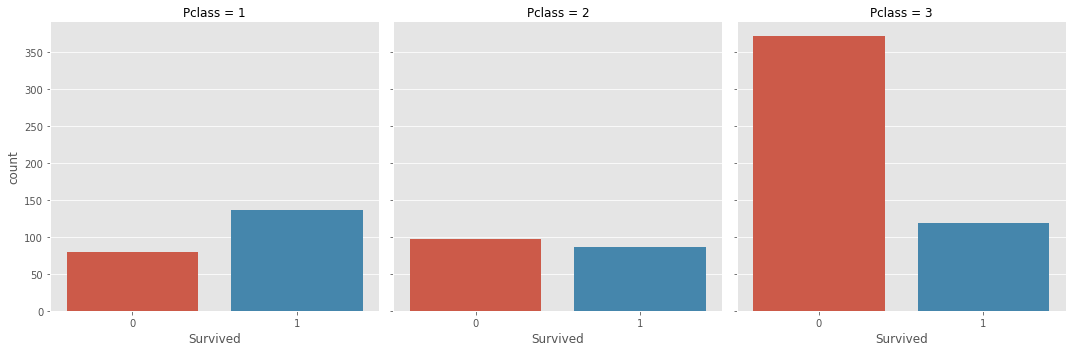

In [ ]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train);

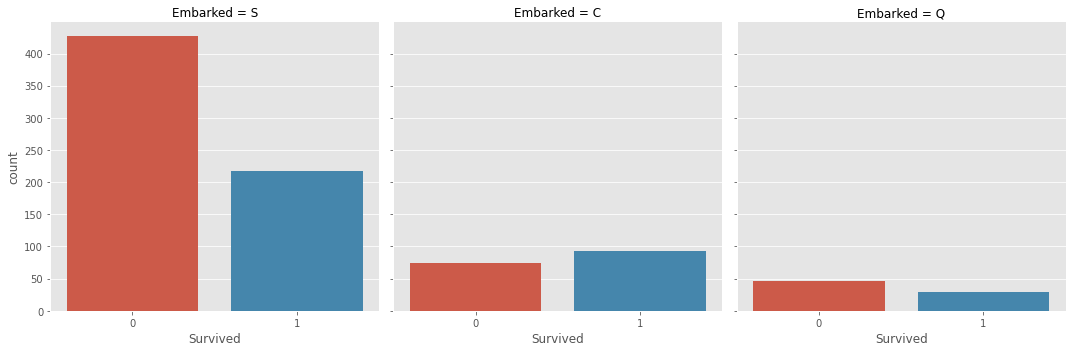

In [ ]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);

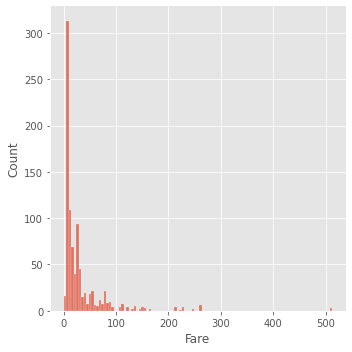

In [ ]:
sns.displot(train.Fare, kde=False);

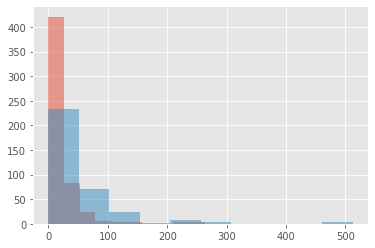

In [ ]:
train.groupby('Survived').Fare.hist(alpha=0.5);

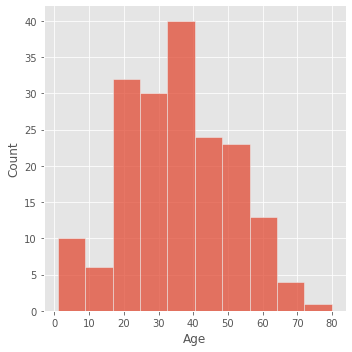

In [ ]:
train_drop = train.dropna()
sns.displot(train_drop.Age, kde=False);

In [ ]:
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


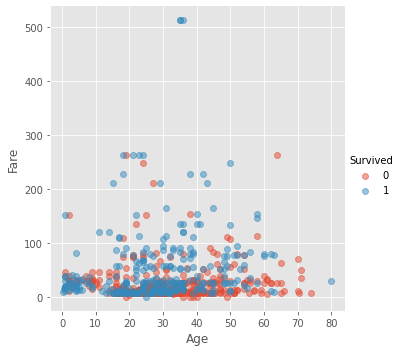

In [ ]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.5});

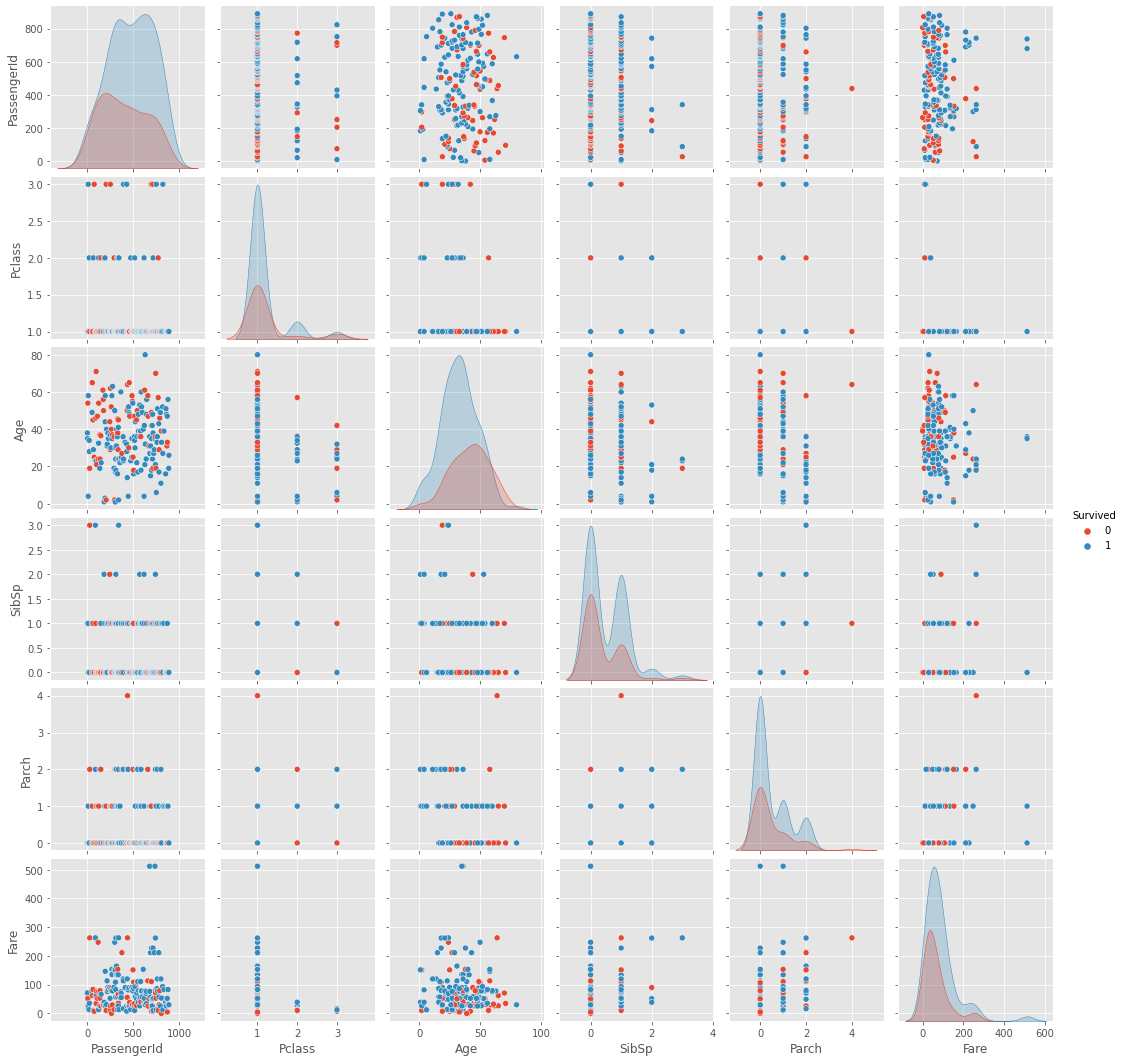

In [ ]:
sns.pairplot(train_drop, hue='Survived');

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Impute missing numerical variables
train['Age'] = train.Age.fillna(train.Age.median())
train['Fare'] = train.Fare.fillna(train.Fare.median())

# Check out info of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
train.PassengerId = train.PassengerId.astype('str')
train.Pclass = train.Pclass.astype('str')

In [ ]:
## Separate numerical and non-numerical features.
non_numerical = train.select_dtypes(exclude=['int64','float64'])
numerical = train.select_dtypes(exclude=['object'])
## Show how many unique values within each non-numerical feature.
non_numerical.astype(str)
non_numerical.nunique(dropna=False)

PassengerId    891
Pclass           3
Name           891
Sex              2
Ticket         681
Cabin          148
Embarked         4
dtype: int64

In [130]:

train.Cabin = train.Cabin.astype('str')
train.Deck = train.Cabin.str[0]
train.Cabin = train.Cabin.fillna('no_cabin')
#train.Cabin.unique()
#cabin_vals = list(train.Cabin.unique())
#cabin_vals.remove('no_cabin')
## type(cabin_vals)
#cabin_vals[0:10]



In [131]:
train.Deck[0:20]

0     n
1     C
2     n
3     C
4     n
5     n
6     E
7     n
8     n
9     n
10    G
11    C
12    n
13    n
14    n
15    n
16    n
17    n
18    n
19    n
Name: Cabin, dtype: object

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no_cabin,S,no_cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no_cabin
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no_cabin,S,no_cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no_cabin
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no_cabin,S,no_cabin


Text(0.5, 1.0, 'Heatmap Sale Price')

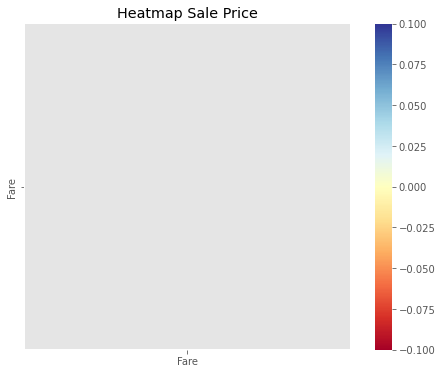

In [ ]:
### **View the UNSCALED correlation between select features and target.**
train["CabinYN"] = train.
# Create a correlation heatmap to find out which 4 variables -AA (Chad added sq ft)
# "HouseAge", "OverallQual", "LotArea" is more correlated with "SalePrice" 
# Create a df for correlation.
columns = ['Fare','Pclass']
df_corr = train[columns]
# setting up the heatmap
corrmat = df_corr.corr()

# mask similar squares
mask = np.triu(np.ones_like(corrmat,dtype=bool))

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5, mask=mask)
plt.title('Heatmap Sale Price')